Nama : Naufal Hilmi Fathul Ihsan

NIM : 5312422039

**Jobsheet 4 - Pemrosesan Sinyal Digital**

Topik: **Pemfilteran sinyal jendela**

contoh: Membuat spektrum sinyal harmonik pendek dengan parameter berikut: panjang sinyal N=256 ,panjang FFT yaitu NFFT=2048. Untuk lebih jelasnya, kita sajikan grafik spektrum dalam skala logaritmik sebagai berikut:





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
import scipy.signal as sig

FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM)
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL)
plt.rc('legend', fontsize=FONT_MEDIUM)
plt.rc('figure', titlesize=FONT_MEDIUM)

%matplotlib inline

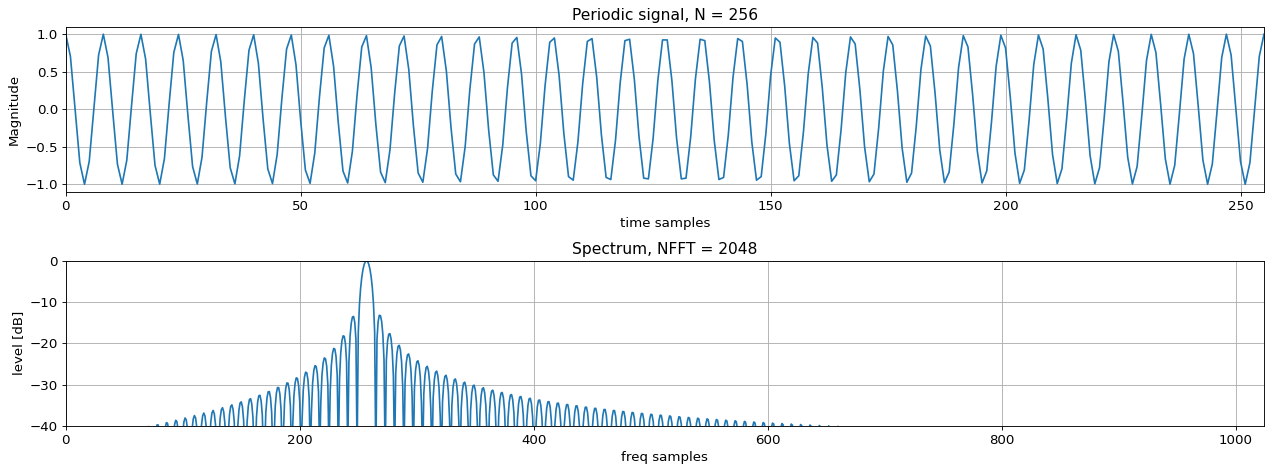

In [ ]:
# Input parameters
N = 256
NFFT = 2048

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

# Calculate FFT
sft = np.abs(fft(xx, NFFT))
slg = 20*np.log10(sft / np.max(sft))

plt.figure(figsize=(16, 6), dpi=80)
plt.subplot(2,1,1)
plt.title('Periodic signal, N = {}'.format(N))
plt.xlabel('time samples')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spectrum, NFFT = {}'.format(NFFT))
plt.xlabel('freq samples')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, NFFT//2])
plt.ylim([-40, 0])
plt.grid(True)
plt.tight_layout()

Kode tersebut bertujuan untuk membuat dan menganalisis spektrum sinyal harmonik pendek menggunakan pemfilteran sinyal jendela.
- Pemfilteran sinyal jendela.
Pemfilteran sinyal jendela adalah teknik untuk mengurangi efek aliasing saat melakukan transformasi Fourier dari sinyal diskrit. Dalam kode tersebut, pemfilteran dilakukan dengan menggunakan jendela Cosine.
- Parameter Sinyal.
N: Panjang sinyal (jumlah sampel sinyal)
NFFT: Panjang FFT (jumlah sampel dalam transformasi Fourier)
Pada contoh ini, N adalah 256 dan NFFT adalah 2048. Perhatikan bahwa NFFT lebih besar dari N, yang umumnya diperlukan untuk interpolasi spektrum dan akurasi yang lebih baik.
- Sinyal Input.
tt: Waktu sampel dari 0 hingga 1 dengan panjang N.
xx: Sinyal kosinus dengan frekuensi 32 Hz.
Sinyal ini digunakan sebagai contoh untuk dianalisis.
- Penghitungan FFT.
fft(xx, NFFT): Menghitung Transformasi Fourier Cepat (FFT) dari sinyal xx dengan panjang NFFT.
np.abs( ): Mengambil nilai absolut dari hasil FFT.
20*np.log10( ): Mengonversi magnitudo menjadi skala logaritmik dalam desibel (dB).
- Visualisasi.
Subplot pertama menunjukkan sinyal input dalam domain waktu.
Subplot kedua menunjukkan spektrum sinyal dalam domain frekuensi.
- Visualisasi Spektrum.
Spektrum disajikan dalam skala logaritmik untuk memberikan representasi yang lebih baik dari komponen frekuensi yang berbeda dalam sinyal.

Berikut penjelasan lebih rinci/kode:
1. Import Library dan Modul:

- 'numpy': Digunakan untuk operasi numerik dan pembuatan array.
- 'matplotlib.pyplot': Digunakan untuk membuat plot.
- 'scipy.fftpack.fft': Digunakan untuk menghitung Transformasi Fourier Cepat (FFT).
- 'scipy.fftpack.fftshift': Digunakan untuk memusatkan hasil FFT.

2. Parameter dan Konstanta:
- 'N': Panjang sinyal (jumlah sampel sinyal).
- 'NFFT': Panjang FFT (jumlah sampel dalam transformasi Fourier).

3. Sinyal Input:

- 'tt' : Waktu sampel dari 0 hingga 1 dengan panjang N.
- 'xx' : Sinyal kosinus dengan frekuensi 32 Hz.

4. Perhitungan FFT:

- 'fft(xx, NFFT)': Menghitung FFT dari sinyal xx dengan panjang NFFT.
- 'np.abs()' : Mengambil nilai absolut dari hasil FFT.

5. Pemrosesan Spektrum:

- '0*np.log10()': Mengonversi magnitudo menjadi skala logaritmik dalam desibel (dB).
- 'np.max(sft)': Mencari nilai maksimum dari hasil FFT.

6. Visusalisasi:

- 'plt.figure()': Membuat gambar (plot) baru.
- 'plt.subplot()': Membuat subplot.
- 'plt.title()', plt.xlabel(), plt.ylabel(): Memberi label pada plot.
- 'plt.plot()': Membuat plot.
- 'plt.xlim()', plt.ylim(): Mengatur batas sumbu x dan y pada plot.
- 'plt.grid()': Menampilkan grid pada plot.
- 'plt.tight_layout()': Menyusun subplot secara otomatis untuk memastikan tata letak yang baik.

Keseluruhan kode ini menghasilkan dua subplot: subplot pertama menunjukkan sinyal input dalam domain waktu, sementara subplot kedua menunjukkan spektrum sinyal dalam domain frekuensi. Dengan demikian, kode ini memungkinkan untuk membuat dan menganalisis spektrum sinyal harmonik pendek dengan menggunakan pemfilteran sinyal jendela.

Seperti yang dapat dilihat, spektrum sinyal harmonik pendek dalam kehidupan nyata tidak setara dengan fungsi delta, namun mirip dengan konvolusi spektrum gelombang persegi dan sinyal harmonik. Grafik menunjukkan paruh pertama domain frekuensi. Sinyal yang dihasilkan simetris sekitar setengah frekuensi atau parameter sampling Nfft/2

spektrum sinyal persegi panjang setara dengan ekspresi ~sin(x)/x=sinc (x)

Artinya, pada frekuensi sinyal pada fungsi delta seolah-olah “melapiskan spektrum jendela persegi panjang. Ketika meningkatkan durasi sinyal harmonik dalam domain waktu, spektrumnya cenderung ke fungsi delta pada frekuensi sinyal ini, dan pengaruh jendela persegi panjang berkurang.

Artinya, batasan domain waktu dari sinyal menghasilkan pengenaan jendela persegi panjang. Pada contoh di bawah ini, durasi sinyal ditingkatkan secara signifikan (N= 65536). Seperti yang dapat dilihat, spektrum sinyal seperti itu cenderung ke fungsi delta:





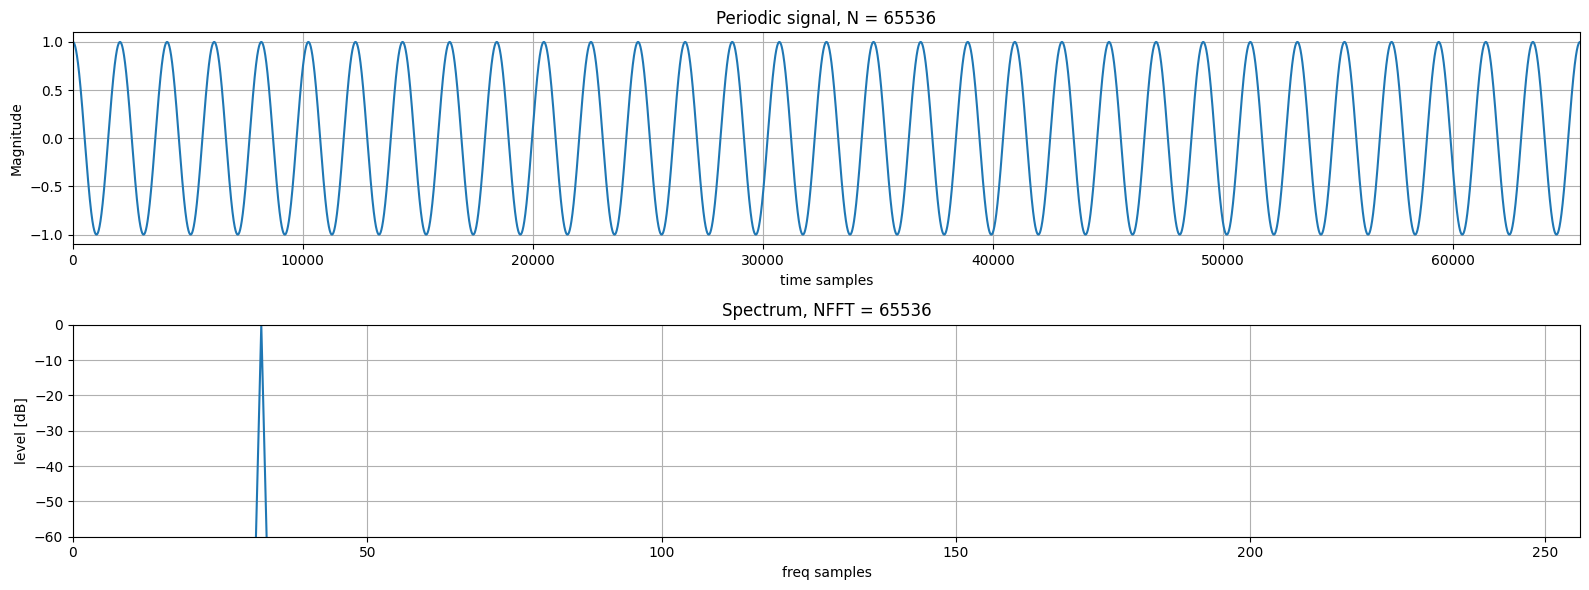

In [ ]:
# Input parameters
N = 65536

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

# Calculate FFT
sft = np.abs(fft(xx, N))
slg = 20*np.log10(sft / np.max(sft))

plt.figure(figsize=(16, 6))
plt.subplot(2,1,1)
plt.title('Periodic signal, N = {}'.format(N))
plt.xlabel('time samples')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spectrum, NFFT = {}'.format(N))
plt.xlabel('freq samples')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, N//256])
plt.ylim([-60, 0])
plt.grid(True)
plt.tight_layout()

Dalam kode diatas, beberapa perubahan dilakukan yaitu:

- Panjang Sinyal (N) : Panjang sinyal diperbesar menjadi 65536, memberikan lebih banyak sampel untuk analisis.
- Perhitungan FFT : Panjang FFT tetap sama dengan panjang sinyal, yaitu 65536. Ini memungkinkan untuk melakukan analisis spektral yang lebih detail pada sinyal yang lebih panjang.
- Batas Plot Spektrum : Batas sumbu x pada subplot spektrum diatur ke N//256, memungkinkan untuk memperluas jangkauan frekuensi yang ditampilkan dalam plot.
- Skala dB pada Plot Spektrum : Skala dB pada subplot spektrum diperluas hingga -60 dB, memberikan informasi yang lebih luas tentang amplitudo berbagai komponen frekuensi dalam sinyal.

Dengan perubahan ini, analisis sinyal yang lebih panjang dapat dilakukan dengan detail spektral yang lebih baik.

Berikut aplikasi penggunakan python untuk mendefinisikan fungsi yang menampilkan fungsi jendela:

In [ ]:
def dft_win(w):
    """
    Plot window function and spectrum of the window

    Parameters
    ----------
    w : np.array
        input window vector
    """

    # Find length of window
    N = len(w)
    # FFT size
    NFFT = 2**12
    # Calculate FFT
    W = fftshift(fft(w, NFFT))
    # Find max and add minimum floating-point value (except divide-by-zero)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)

    # plot window function and its spectrum
    fig = plt.figure(figsize=(16, 6))

    plt.subplot(2,1,1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Window fucntion')
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)

    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

**Fungsi jendela dasar**

Berikut ini adalah ekspresi untuk fungsi jendela dasar. Durasi fungsi jendela adalah -N, w (n) - hitungan dari fungsi window. Dalam pustaka Python scipy, semua jendela yang umum dikenal tersedia dalam paket sinyal. Memanggil mereka cukup sederhana. Berikut ini, efisiensi komparatif dari berbagai window akan ditampilkan dalam bentuk tabel dan grafik.
Aturan: jumlah modulus dari koefisien fungsi jendela sama dengan satu!

Jendela persegi panjang w(n)=1

Jendela paling sederhana memiliki karakteristik terburuk dan diperoleh secara otomatis dengan memotong urutannya menjadi
 sampel. Level lobus samping maksimum (SLL) dari respons frekuensi jendela persegi panjang: -13 dB.

<ipython-input-9-31608e76ed6f>:29: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


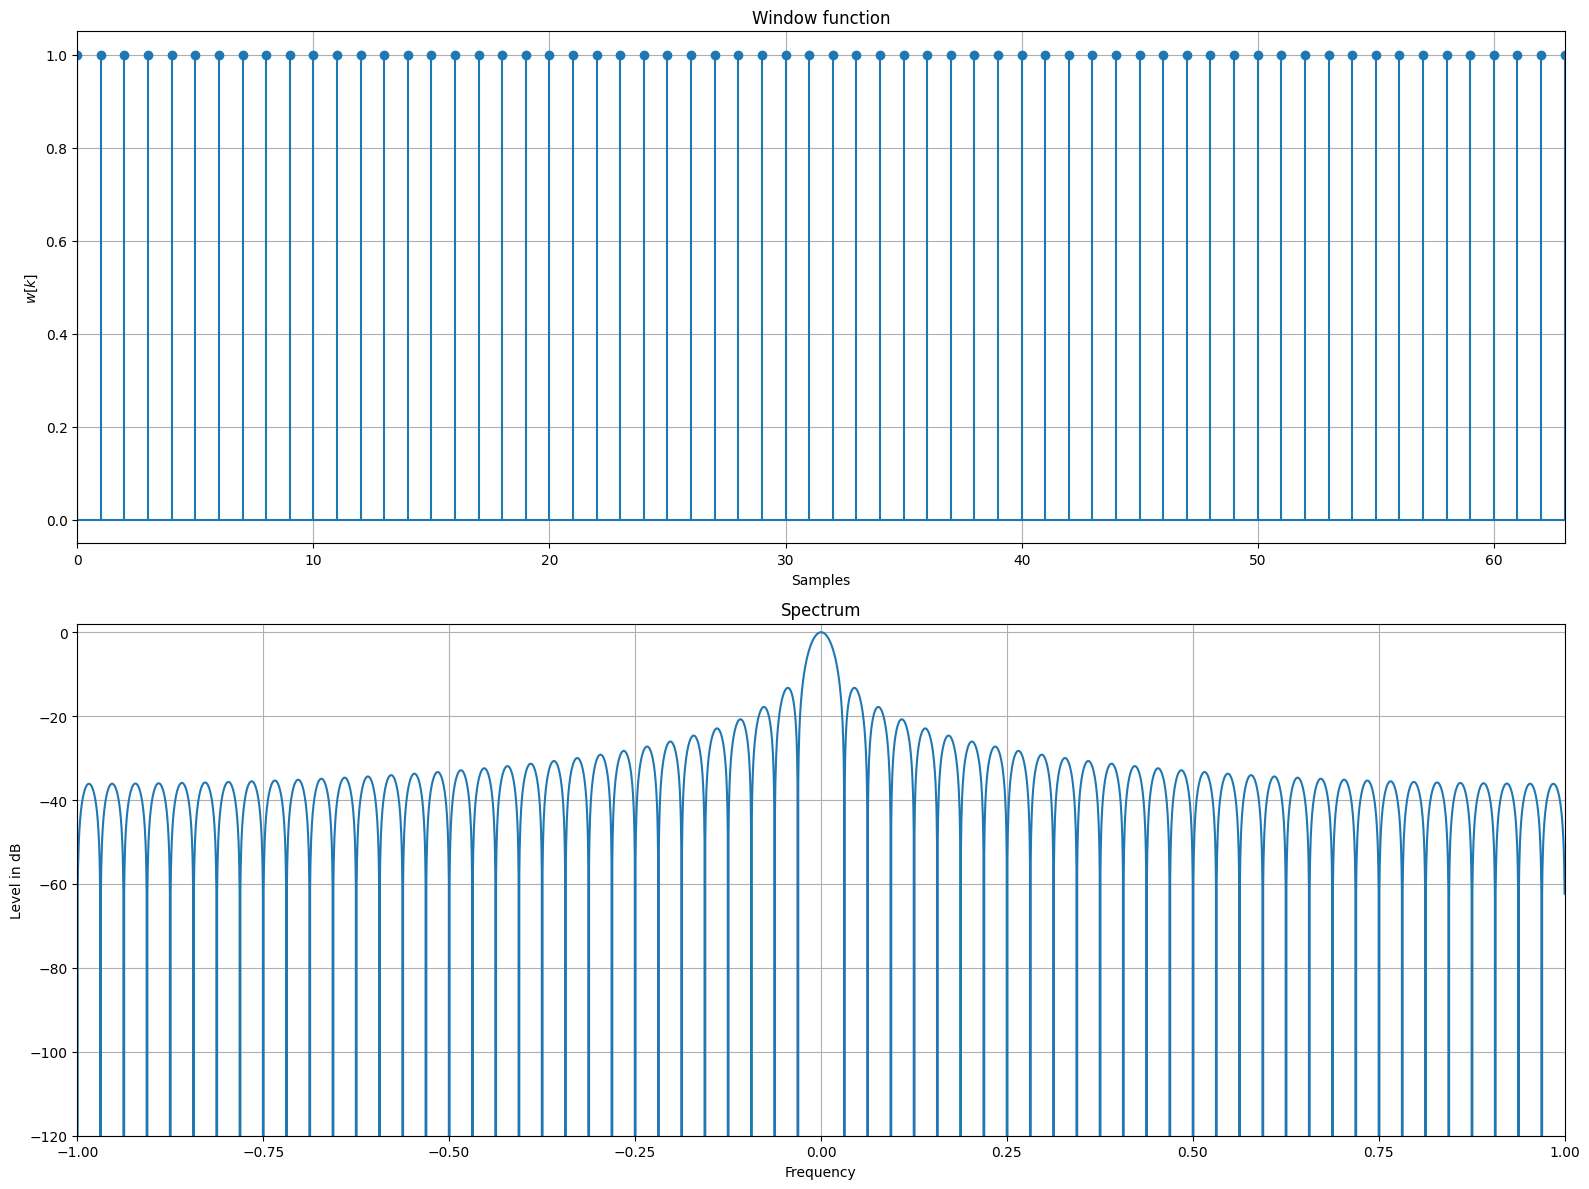

In [ ]:
N = 64
dft_win(np.ones(N))

Ketika memanggil 'dft_win(np.ones(N))' dengan N = 64, akan memberikan vektor jendela yang terdiri dari 64 angka satu. Artinya, semua nilai dalam jendela ini adalah sama, yaitu satu.

- Plot Pertama: Plot Jendela
Pada plot pertama, kita hanya melihat garis horizontal pada tingkat satu di setiap sampel. Ini karena setiap sampel dalam vektor jendela memiliki nilai satu. Jadi, kita melihat jendela persegi yang sederhana dengan tingkat satu di setiap titik.

- Plot Kedua: Plot Spektrum
Pada plot kedua, kita melihat spektrum dari jendela tersebut. Karena jendela yang diberikan adalah jendela persegi (rectangular window), spektrumnya akan menunjukkan pola osilasi yang disebut fungsi sinc. Ini terjadi karena jendela persegi dalam domain waktu memiliki spektrum sinc dalam domain frekuensi. Pola osilasi ini memiliki puncak utama di tengah plot, yang berkurang secara bertahap saat frekuensi meningkat atau menurun dari pusat.

Jadi, secara singkat, dapat melihat dua plot: plot satu untuk merepresentasikan jendela, dan yang lainnya untuk merepresentasikan spektrum dari jendela tersebut. Dua plot tersebut mewakili jendela persegi dan spektrumnya dalam domain frekuensi.

# **Jendela segitiga**

Juga dikenal sebagai jendela Bartlett: w(n)=1 - n-N/2/L/2 . Dimana L= N,N + 1, N+2.  

Python: signal.triang(M) или bartlett(M)


<ipython-input-16-3422908e8bb7>:2: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.triang(N))
<ipython-input-15-ecfe86066409>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


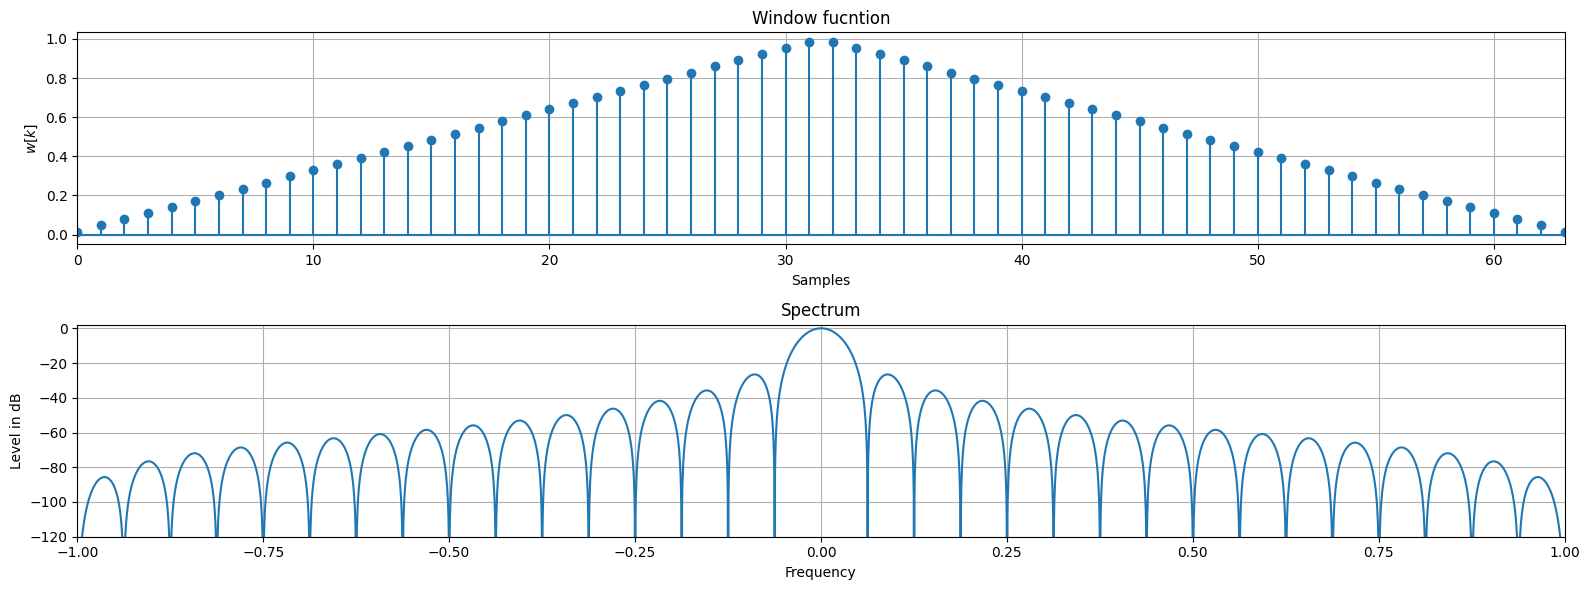

In [ ]:
N = 64
dft_win(sig.triang(N))

Ketika memanggil fungsi 'dft_win(sig.triang(N))' dengan N = 64, dapat memberikan vektor jendela yang dibuat menggunakan fungsi triangular window (jendela segitiga) dari modul scipy.signal.

- Plot Pertama: Plot Jendela

Pada plot pertama akan melihat bentuk jendela segitiga. Jendela segitiga memiliki karakteristik di mana nilainya mulai dari nol di luar titik tengah, meningkat secara linear ke nilai maksimum di titik tengah, dan kemudian kembali lagi ke nol. Plot ini akan menunjukkan peningkatan linear, puncak di tengah, dan kemudian penurunan linear kembali ke nol.

- Plot Kedua: Plot Spektrum

Pada plot kedua akan melihat spektrum dari jendela segitiga. Jendela segitiga dalam domain waktu memiliki spektrum yang dikenal sebagai fungsi sinc kuadrat, yang memiliki pola osilasi yang lebih luas dan lebih halus daripada jendela persegi. Disini dapat melihat pola osilasi ini dalam plot spektrum, dengan puncak utama di tengah plot yang semakin menurun saat frekuensi meningkat atau menurun dari pusat.

Jadi, dengan memplot jendela segitiga dan spektrumnya, bisa melihat bagaimana karakteristik jendela ini mempengaruhi spektrumnya dalam domain frekuensi.

# **SINUS**

Sederhana dalam hal implementasi perangkat lunak dan perangkat keras jendela. Tingkat lobus sisi jendela sinus maksimum: -23 dB.

Python: signal.cosine(M)

<ipython-input-17-a414f4eafc15>:2: DeprecationWarning: Importing cosine from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.cosine' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.cosine(N))
<ipython-input-15-ecfe86066409>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


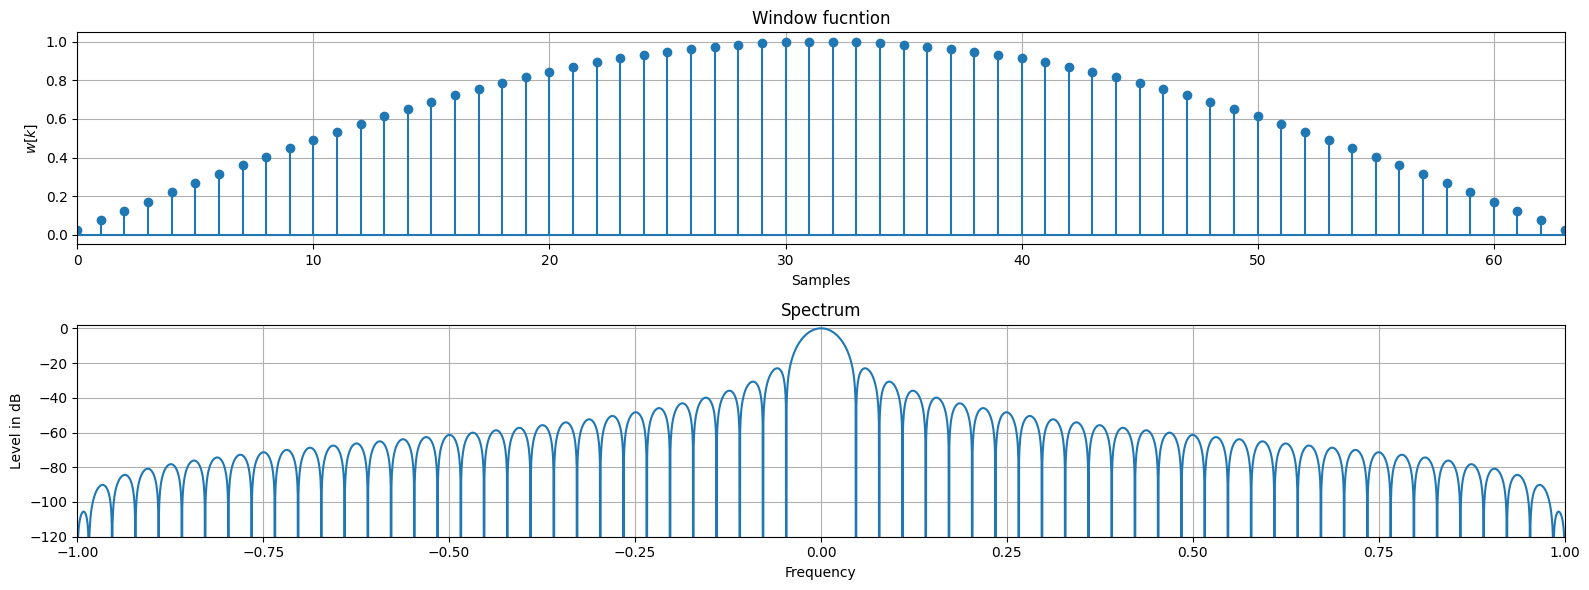

In [ ]:
N = 64
dft_win(sig.cosine(N))

Ketika memanggil fungsi 'dft_win(sig.cosine(N))' dengan N = 64, akan memberikan vektor jendela yang dibuat menggunakan fungsi cosine window (jendela kosinus) dari modul scipy.signal.

- Plot Pertama: Plot Jendela

Pada plot pertama dapat melihat bentuk jendela kosinus. Jendela kosinus memiliki karakteristik di mana nilainya dimulai dan berakhir pada nol di ujung-ujungnya, dan mencapai nilai maksimum di tengah. Plot ini akan menunjukkan gelombang kosinus yang dimulai dan berakhir pada nol di luar jendela, mencapai nilai maksimum di tengah jendela, dan kemudian kembali lagi ke nol.

- Plot Kedua: Plot Spektrum

Pada plot kedua bisa melihat spektrum dari jendela kosinus. Jendela kosinus dalam domain waktu memiliki spektrum yang lebih lebar dan lebih halus daripada jendela segitiga, tetapi lebih terbatas dibandingkan dengan jendela Hann. Plot spektrum akan menunjukkan pola osilasi yang kurang tajam daripada jendela segitiga, tetapi masih memiliki puncak utama yang jelas di tengah plot.

Dengan memplot jendela kosinus dan spektrumnya, dapat melihat bagaimana karakteristik jendela ini mempengaruhi spektrumnya dalam domain frekuensi.

# **Jendela Hahn (Henning)**

Jendela ini juga disebut jendela Blackman-Harris orde kedua. Tingkat maksimum lobus samping jendela sinusoidal: -31,5 dB.

Python: signal.hann(M) и signal.hanning(M)

<ipython-input-18-b291e8665b0a>:2: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.hann(N))
<ipython-input-15-ecfe86066409>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


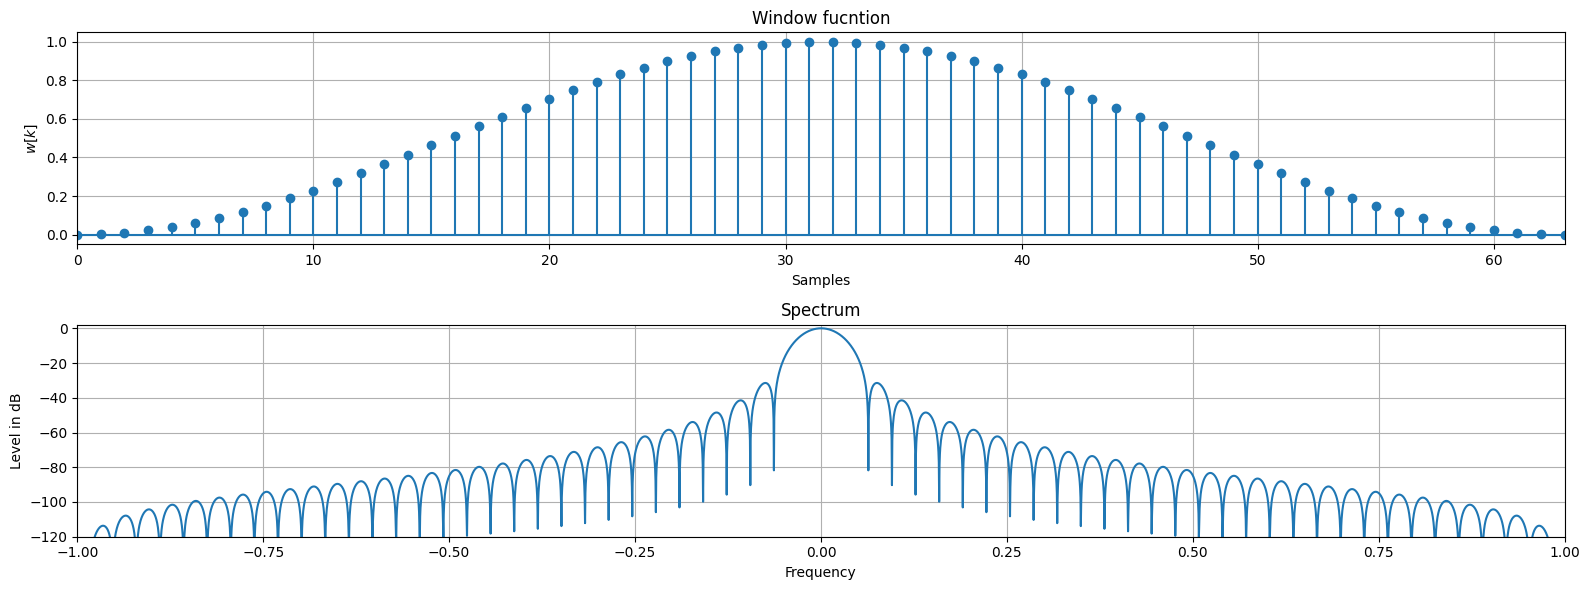

In [ ]:
N = 64
dft_win(sig.hann(N))

Ketika 'dft_win(sig.hann(N))' dipanggil dengan N = 64, sebenarnya untuk membuat jendela Hann dari panjang 64 menggunakan fungsi sig.hann(N) dari modul scipy.signal.

- Plot Pertama: Plot Jendela

Di plot pertama dapat melihat bentuk jendela Hann. Jendela Hann memiliki karakteristik yang dimulai dan berakhir pada nol di ujung-ujungnya, dan mencapai nilai maksimum di tengah. Plot ini menampilkan gelombang kurva yang mulai naik dari nol, mencapai puncak di tengah, dan kemudian turun kembali ke nol.

- Plot Kedua: Plot Spektrum

Pada plot kedu bisa melihat spektrum dari jendela Hann. Jendela Hann memiliki spektrum yang lebih terfokus daripada jendela kosinus atau segitiga, dengan puncak utama yang lebih tinggi dan lebih tajam di tengah plot. Ini menghasilkan puncak yang lebih jelas di frekuensi pusat, dan penurunan yang lebih cepat dari amplitudo pada frekuensi yang lebih tinggi dan lebih rendah.

Dengan memplot jendela Hann dan spektrumnya, kita dapat melihat bagaimana karakteristik jendela ini memengaruhi distribusi energi dalam domain frekuensi.








# **Jendela hemming**

Level lobus samping maksimum: -42 dB.

Python: signal.hamming(M)

<ipython-input-19-ff0937091f0d>:2: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.hamming(N))
<ipython-input-15-ecfe86066409>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


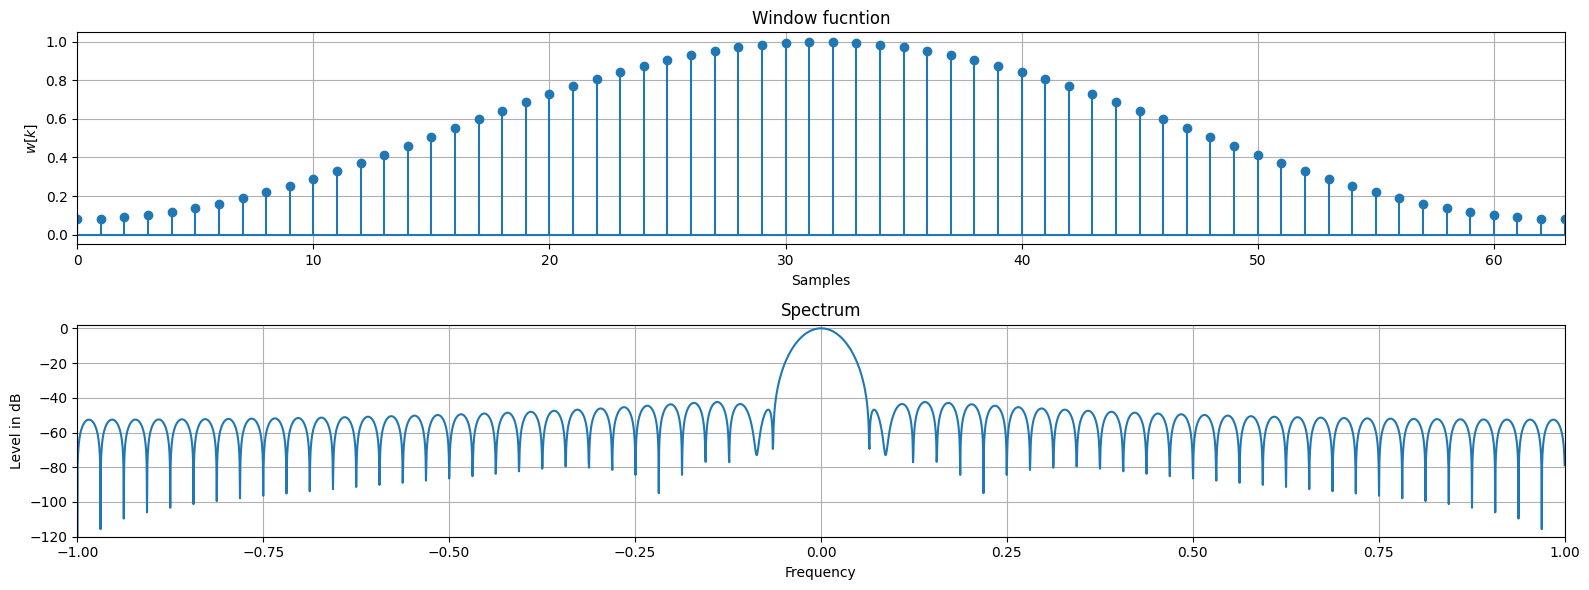

In [ ]:
N = 64
dft_win(sig.hamming(N))

Ketika memanggil fungsi 'dft_win(sig.hamming(N))' dengan N = 64, Anda membuat jendela Hamming dari panjang 64.

- Plot Pertama: Jendela Hamming memiliki bentuk kurva yang mulus, dimulai dan berakhir pada nol di ujung-ujungnya, dengan nilai maksimum di tengah.
- Plot Kedua: Spektrum jendela Hamming menampilkan puncak yang tajam di tengah plot, menurun cepat pada frekuensi yang lebih tinggi dan lebih rendah.

Ini menunjukkan bagaimana karakteristik jendela Hamming mempengaruhi distribusi energi dalam domain frekuensi.

# **Jendela Blackman**

Pada α = 0.16 tingkat lobus samping maksimum: -58 dB.

Python: signal.blackman(M)

<ipython-input-20-dada6642a747>:2: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackman' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.blackman(N))
<ipython-input-15-ecfe86066409>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


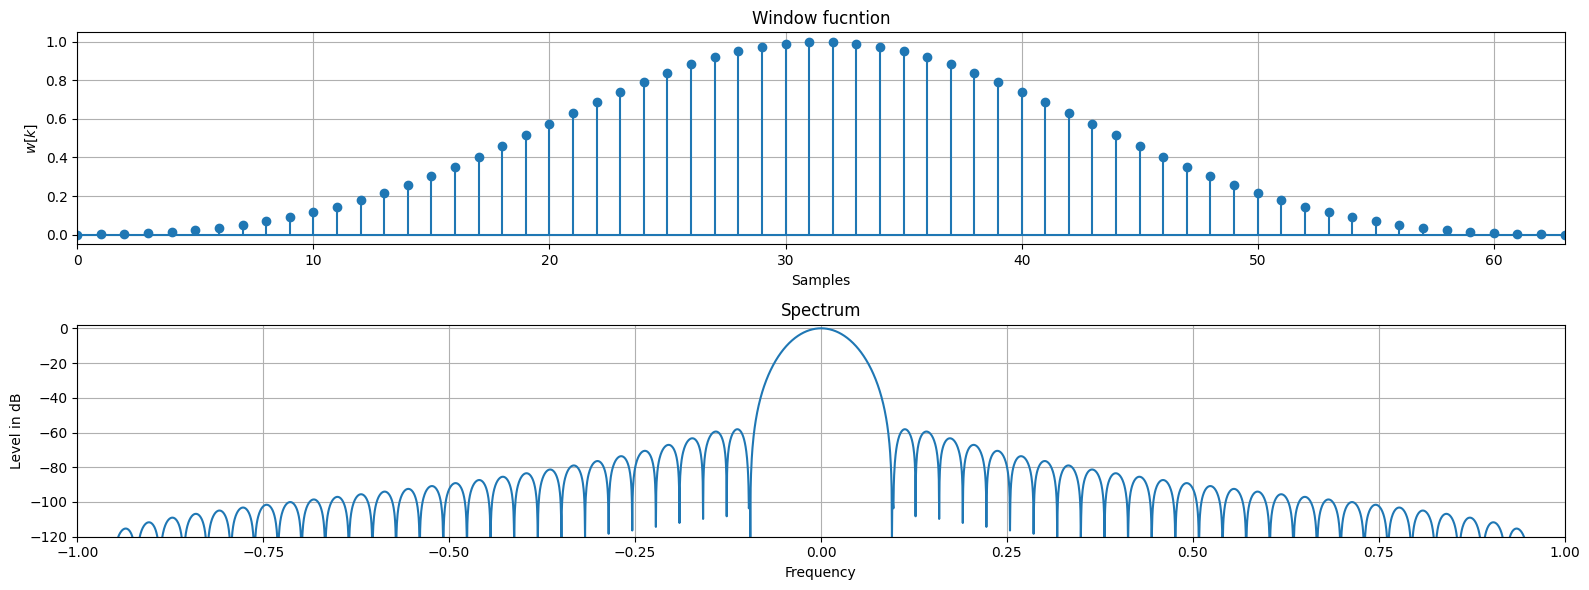

In [ ]:
N = 64
dft_win(sig.blackman(N))

Ketika 'dft_win(sig.blackman(N))' dipanggil dengan N = 64, digunakan jendela Blackman dari panjang 64.

- Plot Pertama: Jendela Blackman menampilkan kurva yang lebih halus dengan dua puncak kecil di tengah dan penurunan yang lambat dari nol di kedua ujungnya.
- Plot Kedua: Spektrum jendela Blackman menunjukkan penurunan yang cepat dari amplitudo pada frekuensi yang lebih tinggi dan lebih rendah, dengan karakteristik yang halus.

Ini menggambarkan bagaimana karakteristik jendela Blackman memengaruhi distribusi energi dalam domain frekuensi.

# **Jendela Blackman-Harris**

Level lobus samping maksimum: -92 dB.

Python: signal.blackmanharris(M)

<ipython-input-21-29d6c58d944e>:2: DeprecationWarning: Importing blackmanharris from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackmanharris' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.blackmanharris(N))
<ipython-input-15-ecfe86066409>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


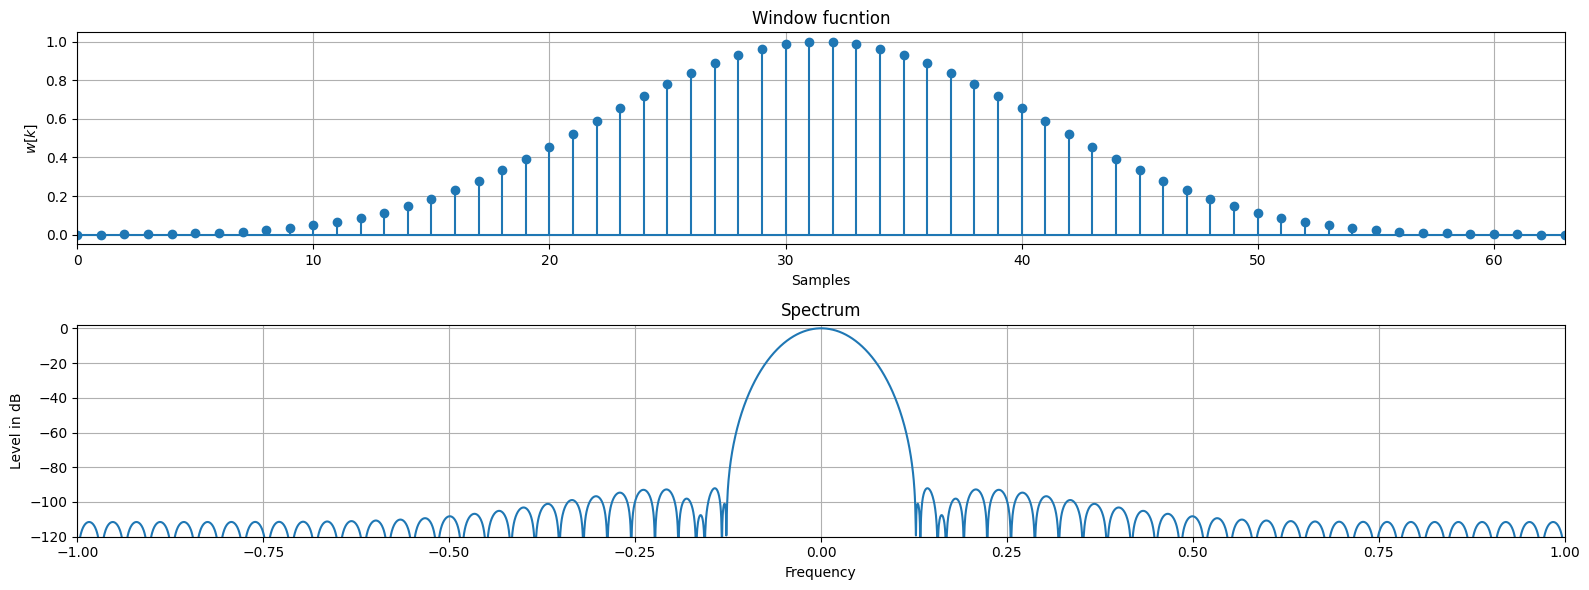

In [ ]:
N = 64
dft_win(sig.blackmanharris(N))

Ketika 'dft_win(sig.blackmanharris(N))' dipanggil dengan N = 64, menggunakan jendela Blackman-Harris dari panjang 64.

- Plot Pertama: Jendela Blackman-Harris menampilkan kurva yang lebih halus dan simetris dengan beberapa puncak kecil di tengah dan penurunan yang lambat dari nol di kedua ujungnya.
- Plot Kedua: Spektrum jendela Blackman-Harris menunjukkan penurunan yang cepat dari amplitudo pada frekuensi yang lebih tinggi dan lebih rendah, dengan karakteristik yang halus dan lebih terfokus daripada jendela Blackman biasa.

Ini menggambarkan bagaimana karakteristik jendela Blackman-Harris memengaruhi distribusi energi dalam domain frekuensi.

# **Jendela Blackman-Nuttall**

Tingkat lobus samping maksimum: -93 dB.

Python: signal.nuttall(M)

<ipython-input-22-768cb33a07e8>:2: DeprecationWarning: Importing nuttall from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.nuttall' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.nuttall(N))
<ipython-input-15-ecfe86066409>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


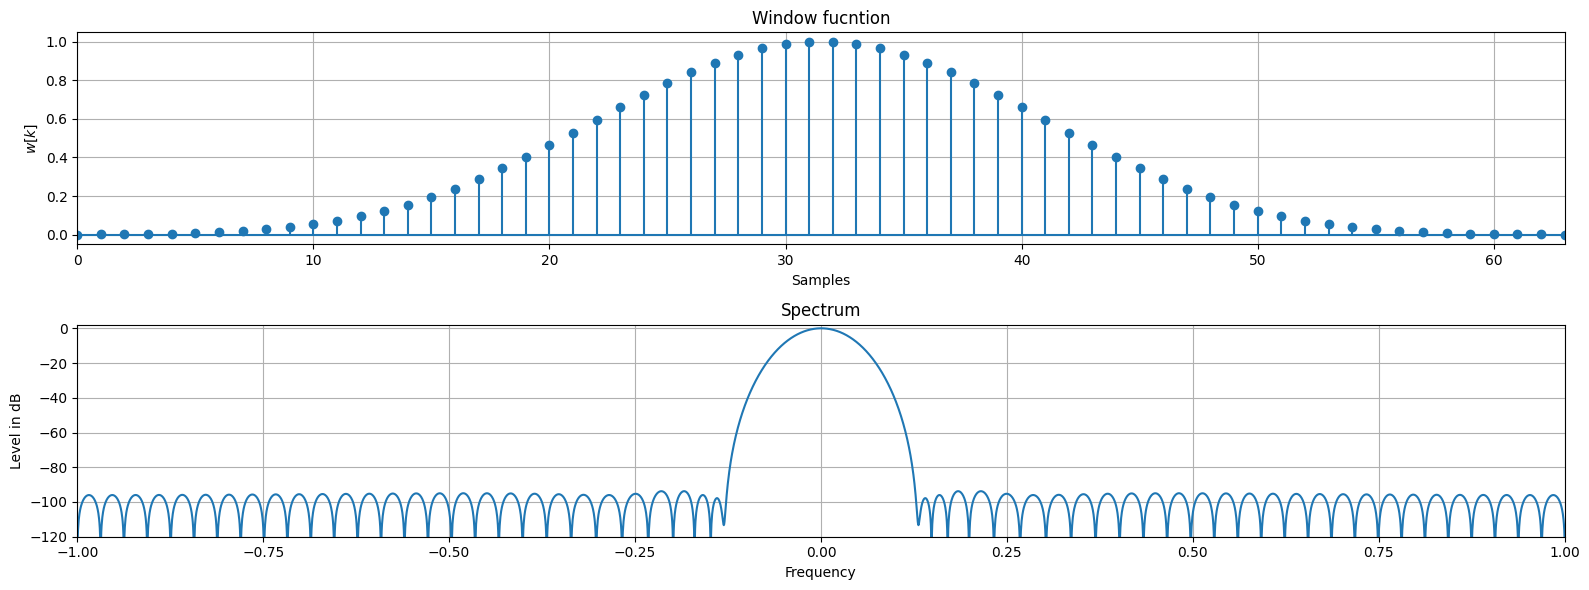

In [ ]:
N = 64
dft_win(sig.nuttall(N))

menggunakan fungsi 'dft_win(sig.nuttall(N))' dengan N = 64, jendela Nuttall digunakan dengan panjang 64.

- Plot Pertama: Jendela Nuttall menampilkan kurva yang halus dengan puncak kecil di tengah dan penurunan yang lambat dari nol di kedua ujungnya.
- Plot Kedua: Spektrum jendela Nuttall menunjukkan penurunan yang cepat dari amplitudo pada frekuensi yang lebih tinggi dan lebih rendah, dengan karakteristik yang halus dan fokus.

Ini memberikan gambaran tentang bagaimana jendela Nuttall mempengaruhi distribusi energi dalam domain frekuensi.

# **Jendela atas datar (Flat-top window)**

Tingkat lobus samping maksimum: -70 dB.

Python: signal.flattop(M)

<ipython-input-23-37796a740dd6>:2: DeprecationWarning: Importing flattop from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.flattop' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.flattop(N))
<ipython-input-15-ecfe86066409>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


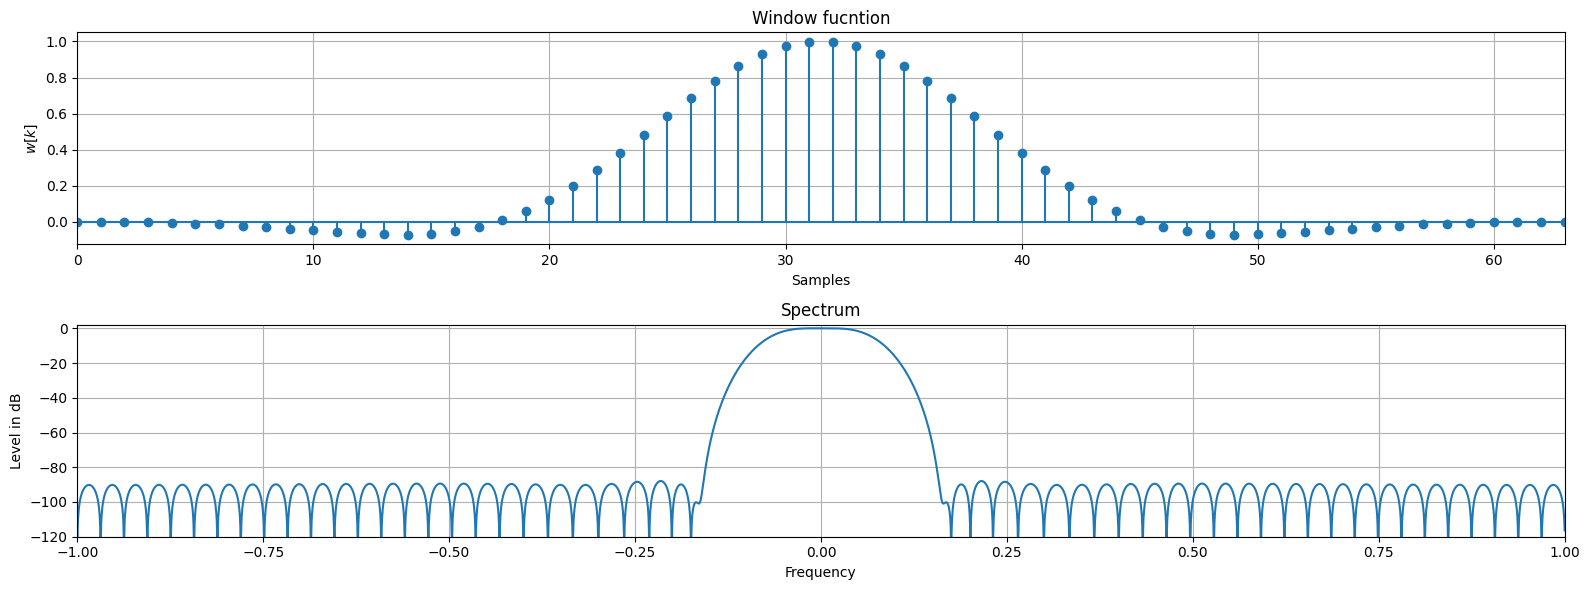

In [ ]:
N = 64
dft_win(sig.flattop(N))

Gunakan 'dft_win(sig.flattop(N))' dengan N = 64, ini akan menerapkan jendela Flattop dengan panjang 64.

- Plot Pertama: Jendela Flattop menampilkan kurva dengan puncak kecil di tengah dan penurunan yang lebih cepat dari nol di ujungnya.
- Plot Kedua: Spektrum jendela Flattop menunjukkan penurunan yang sangat cepat dari amplitudo pada frekuensi yang lebih tinggi dan lebih rendah, dengan karakteristik yang lebih terfokus daripada beberapa jendela lainnya.

Ini memberikan gambaran tentang bagaimana jendela Flattop memengaruhi distribusi energi dalam domain frekuensi.








# **Jendela Kaiser**

Bervariasi dengan parameter yang menentukan tingkat atenuasi dan kecuraman penurunan respons frekuensi. Jendela Kaiser adalah sejenis jendela universal, dengan bantuannya Anda dapat memilih parameter pemfilteran ini atau itu untuk kelas tugas yang luas.

Semakin besar bagian energi di dalam lobus utama, dan semakin lebar lobus utama. Akibatnya, semakin kecil tingkat lobus samping (penekanan yang lebih baik dalam tugas pemfilteran). Dalam praktiknya, fungsi Kaiser tidak secara praktis diimplementasikan dalam perangkat keras, tetapi diterapkan dalam perangkat lunak (perhitungan koefisien filter FIR). Dalam tugas-tugas nyata, nilainya β dari 5 hingga 11.

Python: signal.kaiser(M, beta)

<ipython-input-24-b9ddcfd5a9f8>:2: DeprecationWarning: Importing kaiser from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.kaiser' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.kaiser(N, beta=4))
<ipython-input-15-ecfe86066409>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


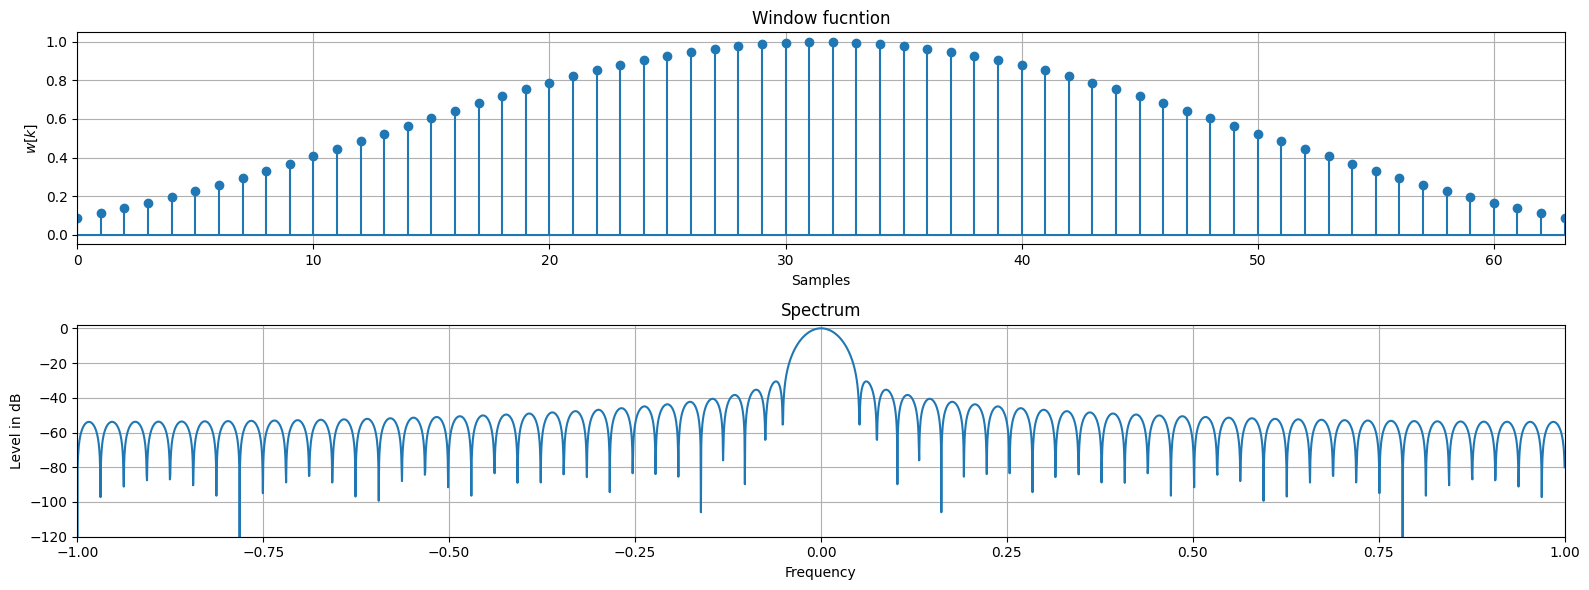

In [ ]:
N = 64
dft_win(sig.kaiser(N, beta=4))

Dengan menggunakan fungsi 'dft_win(sig.kaiser(N, beta=4))' dengan N = 64, jendela Kaiser diterapkan dengan parameter beta sebesar 4 pada panjang 64.

- Plot Pertama: Jendela Kaiser menampilkan kurva dengan penurunan yang halus dari nol di kedua ujungnya dan puncak yang lebih tajam di tengah, dibandingkan dengan jendela-jendela lainnya. Ini karena parameter beta yang lebih tinggi (4) menghasilkan jendela dengan sisi yang lebih tajam dan lobus samping yang lebih rendah.

- Plot Kedua: Spektrum jendela Kaiser menunjukkan penurunan yang cepat dari amplitudo pada frekuensi yang lebih tinggi dan lebih rendah, dengan karakteristik yang lebih fokus di sekitar frekuensi pusat. Hal ini disebabkan oleh sifat jendela Kaiser yang memiliki lobi samping yang rendah, yang menghasilkan respons frekuensi yang lebih terkonsentrasi di sekitar frekuensi pusat.

Ini memberikan gambaran yang lebih spesifik tentang bagaimana penggunaan jendela Kaiser dengan parameter beta 4 memengaruhi distribusi energi dalam domain frekuensi.

<ipython-input-25-cac8307b45fe>:2: DeprecationWarning: Importing kaiser from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.kaiser' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.kaiser(N, beta=10))
<ipython-input-15-ecfe86066409>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


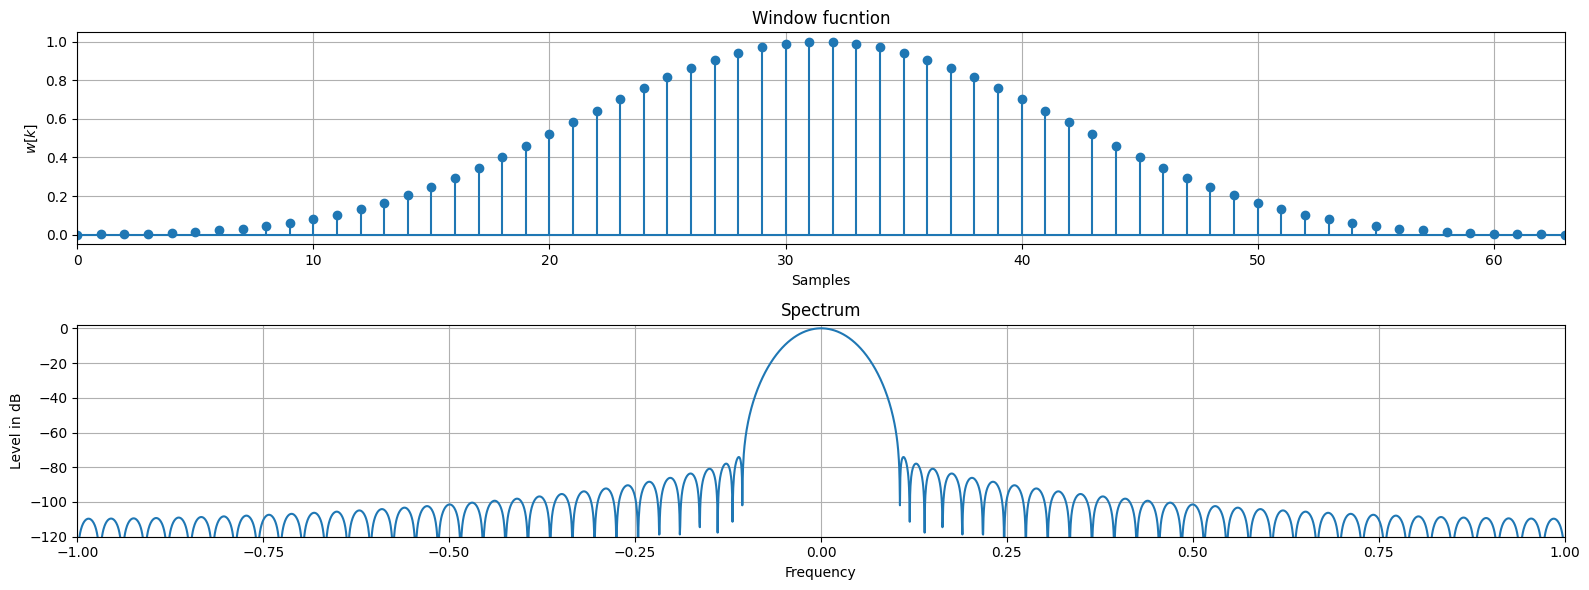

In [ ]:
N = 64
dft_win(sig.kaiser(N, beta=10))

Ketika 'dft_win(sig.kaiser(N, beta=10))' dipanggil dengan N = 64, jendela Kaiser diterapkan dengan parameter beta sebesar 10 pada panjang 64.

- Plot Pertama: Jendela Kaiser menampilkan kurva yang mulus dengan penurunan yang cepat dari nol di kedua ujungnya dan puncak yang lebih tajam di tengah. Parameter beta yang tinggi (10) menghasilkan jendela dengan sisi yang lebih tajam dan lobus samping yang lebih rendah.
- Plot Kedua: Spektrum jendela Kaiser menunjukkan penurunan yang cepat dari amplitudo pada frekuensi yang lebih tinggi dan lebih rendah, dengan karakteristik yang lebih fokus di sekitar frekuensi pusat. Ini karena jendela Kaiser dengan parameter beta yang tinggi menghasilkan lobi samping yang lebih rendah, yang mengarah pada respons frekuensi yang lebih terkonsentrasi di sekitar frekuensi pusat.

Dengan demikian, menggunakan jendela Kaiser dengan parameter beta 10 memberikan distribusi energi frekuensi yang lebih terfokus dan respons yang lebih tajam di sekitar frekuensi pusat.








# **Jendela Gaussian**

Jendela Gaussian ditentukan oleh fungsi eksponensial dan bervariasi oleh parameter varians (deviasi standar).





Sifat frekuensi dari jendela bergantung pada parameter σ.
Semakin besar σ adalah semakin sempit lobus utama, tetapi semakin tinggi tingkat lobus samping (penekanan yang lebih buruk).

Dalam praktiknya, jendela Gauss tidak diimplementasikan secara praktis dalam perangkat keras, tetapi digunakan dalam perangkat lunak, misalnya, dalam tugas menghitung koefisien filter FIR.

Python: signal.gaussian(M, std)

<ipython-input-26-b233c3ec36d7>:2: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.gaussian(N, std=16))
<ipython-input-15-ecfe86066409>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


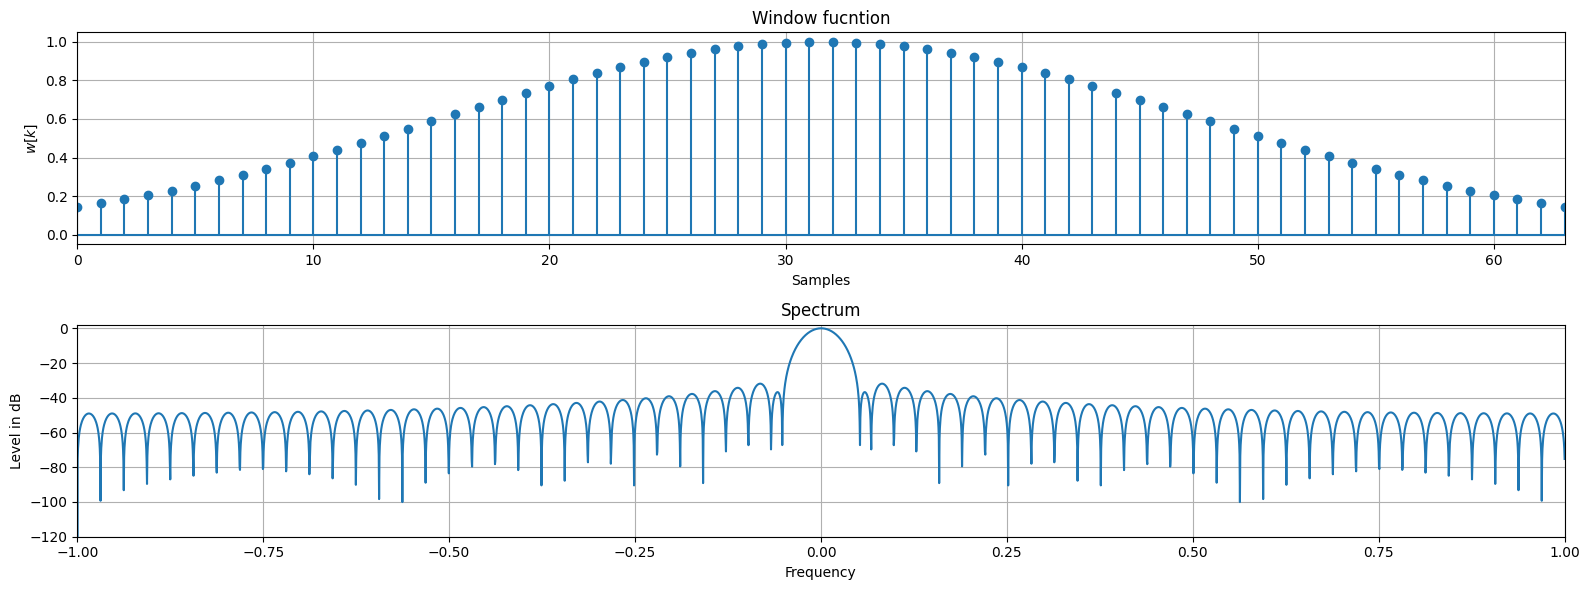

In [ ]:
N = 64
dft_win(sig.gaussian(N, std=16))


Saat 'dft_win(sig.gaussian(N, std=16))' dipanggil dengan N = '64'. Jendela Gaussian diterapkan dengan standar deviasi sebesar 16 pada panjang 64.

- Plot Pertama: Jendela Gaussian menampilkan kurva yang memiliki bentuk lonceng simetris dengan pusat di tengah dan standar deviasi 16. Ini menghasilkan penurunan yang cepat dari nol di kedua ujungnya.

- Plot Kedua: Spektrum jendela Gaussian menunjukkan respons frekuensi yang halus dengan distribusi energi yang terpusat di sekitar frekuensi pusat. Karakteristik jendela Gaussian menyebabkan respons frekuensi yang lebih terfokus dan distribusi energi yang lebih padat di sekitar frekuensi pusat.

Dengan demikian, menggunakan jendela Gaussian dengan standar deviasi 16 menghasilkan respons frekuensi yang lebih terfokus di sekitar frekuensi pusat, dengan penurunan yang cepat dari amplitudo pada frekuensi yang lebih tinggi dan lebih rendah.

<ipython-input-27-f59dbe3d1369>:2: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.gaussian(N, std=8))
<ipython-input-15-ecfe86066409>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


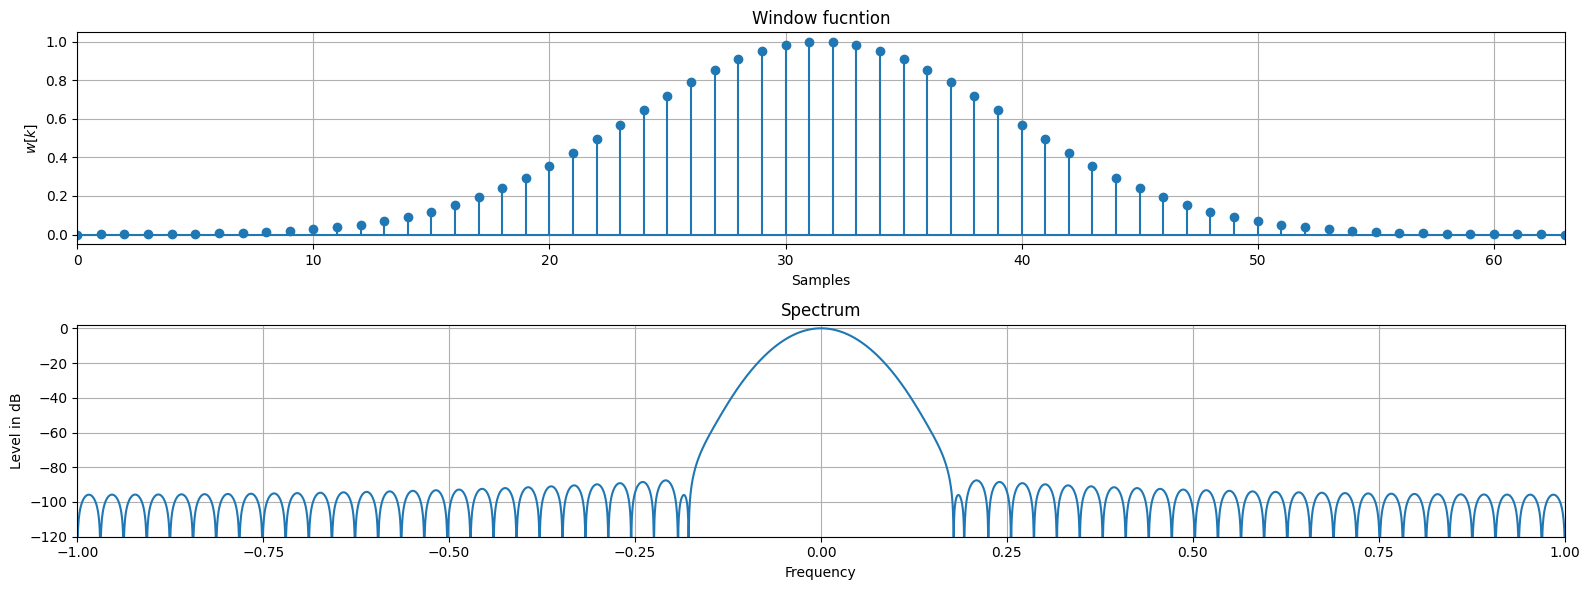

In [ ]:
N = 64
dft_win(sig.gaussian(N, std=8))

Ketika 'dft_win(sig.gaussian(N, std=8))' dipanggil dengan N = 64, jendela Gaussian diterapkan dengan standar deviasi sebesar 8 pada panjang 64.

- Plot Pertama: Jendela Gaussian menampilkan kurva yang memiliki bentuk lonceng simetris dengan pusat di tengah dan standar deviasi 8. Ini menghasilkan penurunan yang cepat dari nol di kedua ujungnya.

- Plot Kedua: Spektrum jendela Gaussian menunjukkan respons frekuensi yang halus dengan distribusi energi yang terpusat di sekitar frekuensi pusat. Karakteristik jendela Gaussian menyebabkan respons frekuensi yang lebih terfokus dan distribusi energi yang lebih padat di sekitar frekuensi pusat, namun dengan lebar yang sedikit lebih besar daripada saat menggunakan standar deviasi 16.

Dengan demikian, menggunakan jendela Gaussian dengan standar deviasi 8 menghasilkan respons frekuensi yang lebih terfokus di sekitar frekuensi pusat, namun dengan sedikit penyebaran yang lebih besar daripada saat menggunakan standar deviasi 16.

# **Fungsi-fungsi jendela dari numpy**

Paket python numpy memiliki sekumpulan fungsi jendela yang terbatas.

- bartlett(M) - fungsi segitiga,
- blackman(M) - fungsi blackman,
- hamming(M) - jendela hamming,
- hanning(M) - jendela Hanning atau Hahn,
- kaiser(M, beta) - jendela kaiser.

Tidak seperti numpy, paket scipy memperluas kemampuan penyaringan jendela, dan seperti yang terlihat pada contoh di atas - melengkapi fungsionalitas.

# **Fungsi jendela utama**

<ipython-input-28-d8f1f2b4be75>:6: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,1] = sig.triang(N)
<ipython-input-28-d8f1f2b4be75>:7: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,2] = sig.hann(N)
<ipython-input-28-d8f1f2b4be75>:8: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,3] = sig.hamming(N)
<ipython-input-28-d8f1f2b4be75>:9: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signa

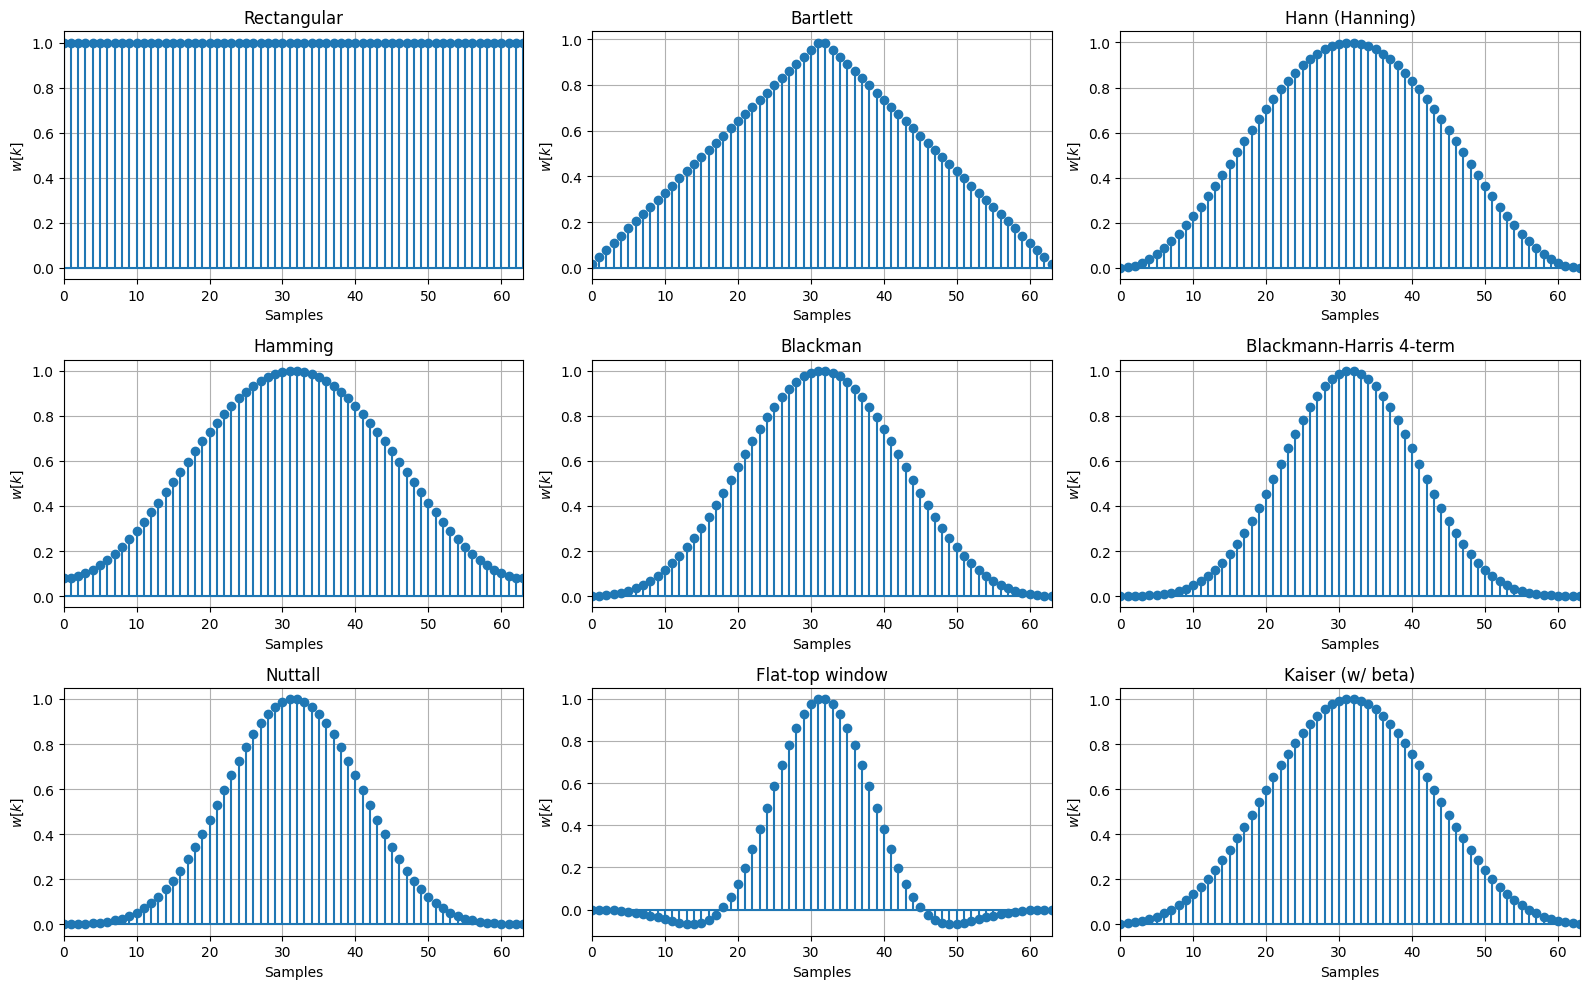

In [ ]:
N = 64
# All windows
ww = np.zeros((N, 9))

ww[:,0] = np.ones(N)
ww[:,1] = sig.triang(N)
ww[:,2] = sig.hann(N)
ww[:,3] = sig.hamming(N)
ww[:,4] = sig.blackman(N)
ww[:,5] = sig.blackmanharris(N)
ww[:,6] = sig.nuttall(N)
ww[:,7] = sig.flattop(N)
ww[:,8] = sig.kaiser(N, beta=8)

lst_titles = ['Rectangular', 'Bartlett', 'Hann (Hanning)',
              'Hamming', 'Blackman', 'Blackmann-Harris 4-term',
              'Nuttall', 'Flat-top window', 'Kaiser (w/ beta)'
             ]

# Plot window function and its spectrum
fig = plt.figure(figsize=(16, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.stem(ww[:,i], use_line_collection=True, basefmt='C0')
    plt.title(lst_titles[i])
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
plt.tight_layout()

Dalam kode diatas, untuk membangun berbagai jenis jendela (windows) dengan panjang 64, termasuk jendela rectangular, Bartlett, Hann (Hanning), Hamming, Blackman, Blackman-Harris 4-term, Nuttall, Flat-top window, dan Kaiser dengan parameter beta sebesar 8. Lalu, memplot fungsi jendela dan spektrumnya.

- Plot Jendela:
Setiap subplot menampilkan jendela dari jenis yang berbeda.
Jendela direpresentasikan sebagai titik-titik pada tingkat-tingkat mereka masing-masing.
Pada sumbu x, kita memiliki sampel-sampel jendela (samples).
Pada sumbu y, kita memiliki nilai-nilai jendela (w[k]).
Setiap jendela memiliki panjang 64 dan ditampilkan dalam range 0 hingga N-1 (dalam hal ini, 63) pada sumbu x.

- Judul Plot:
Setiap plot memiliki judul yang sesuai dengan jenis jendela yang direpresentasikan.
Judul-judul ini membantu mengidentifikasi jenis jendela yang ditampilkan dalam setiap subplot.

- Grid dan Penyusunan:
Setiap subplot memiliki grid yang diaktifkan untuk membantu dalam memahami tingkat-tingkat jendela.
Penyusunan subplot yang disesuaikan untuk menampilkan semua jenis jendela dengan jelas dalam satu gambar.

Berikut untuk penjelasan lebih spesifik kode:

1. Inisialisasi Variabel:
'N = 64': Menentukan panjang jendela yang akan digunakan.

2. Pembuatan Jendela:
'ww = np.zeros((N, 9))': Membuat array kosong dengan ukuran (N, 9) untuk menyimpan semua jenis jendela yang akan dibuat.
'ww[:,i] = ...:' Mengisi setiap kolom dalam array ww dengan jenis jendela yang sesuai menggunakan fungsi-fungsi dari scipy.signal. Misalnya, 'ww[:,0]' diisi dengan jendela rectangular, 'ww[:,1]' dengan jendela Bartlett, dan seterusnya.

3. Judul Plot:
'lst_titles': Mendefinisikan daftar judul untuk setiap jenis jendela yang akan ditampilkan.
Setiap judul sesuai dengan jenis jendela yang dipilih, seperti 'Rectangular', 'Bartlett', 'Hann (Hanning)', dan seterusnya.

4. Plot Jendela:
Pengulangan dilakukan untuk setiap jenis jendela dari 0 hingga 8.
'plt.subplot(3, 3, i+1)': Menentukan posisi subplot dalam grid 3x3.
'plt.stem(ww[:,i]', use_line_collection=True, basefmt='C0'): Membuat plot titik untuk menampilkan nilai-nilai jendela dalam setiap sampelnya.
Setiap subplot menampilkan jendela dengan panjang 64 dan nilai-nilai sesuai dengan jenis jendela yang dipilih.

5. Grid dan Penyusunan:
'plt.grid(True)': Mengaktifkan grid pada setiap subplot untuk memudahkan dalam melihat tingkat-tingkat jendela.
'plt.tight_layout()': Menyusun subplot secara otomatis untuk menghindari tumpang tindih antara judul dan jendela.

Dengan demikian, kode ini menghasilkan grid subplot 3x3 yang menampilkan berbagai jenis jendela dengan panjang 64 dan menunjukkan karakteristik masing-masing jendela dalam domain waktu. Ini memberikan gambaran visual tentang berbagai jenis jendela yang digunakan dalam pemrosesan sinyal digital dan karakteristik masing-masing.



# **Spektrum fungsi jendela utama**

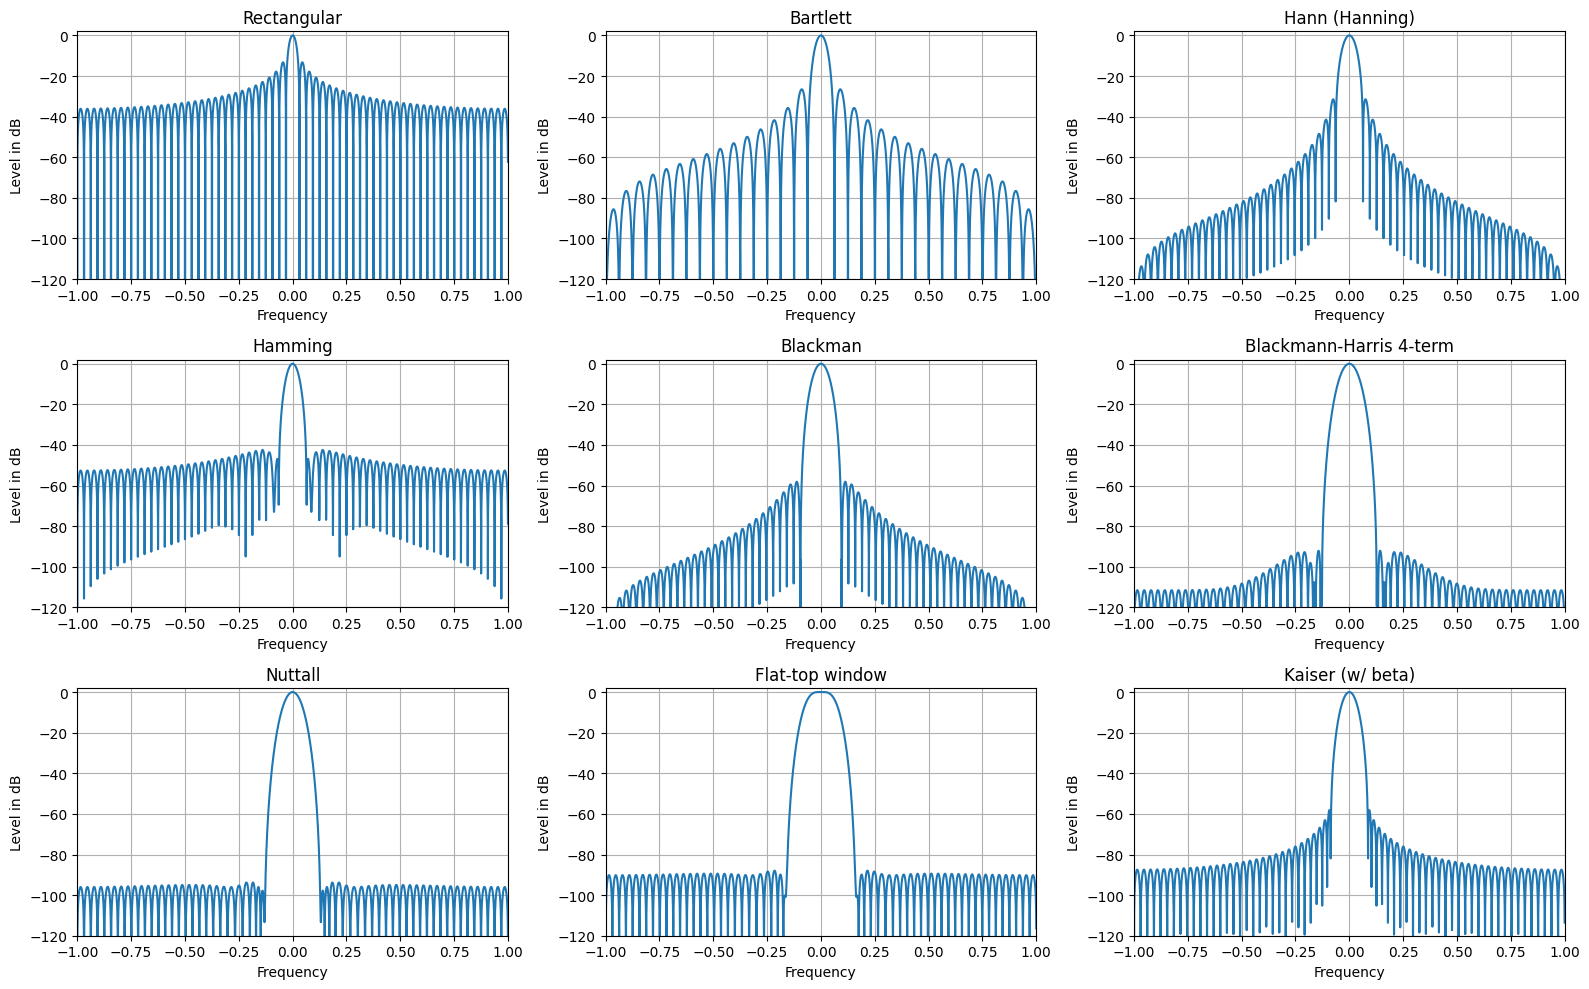

In [ ]:
NFFT = 2**12
# Calculate FFT
WW = fft(ww, NFFT, axis=0)
WW = WW / np.amax(WW, axis=0) + np.nextafter(0,1)

tt = np.linspace(-1, 1, NFFT)

# Plot window function and its spectrum
fig2 = plt.figure(figsize=(16, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(tt, 20*np.log10(np.abs(fftshift(WW[:,i]))))
    plt.title(lst_titles[i])
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
plt.tight_layout()

Dalam bagian tambahan kode tersebut, untuk melakukan transformasi Fourier dari jendela-jendela yang sudah dibuat sebelumnya. Berikut adalah penjelasan kode tersebut:

1. Inisialisasi Variabel:
'NFFT = 2**12': Menentukan panjang FFT (Fast Fourier Transform) yang akan digunakan. Panjang ini dipilih lebih besar dari panjang jendela untuk mendapatkan resolusi frekuensi yang lebih baik.

2. Transformasi Fourier:
'WW = fft(ww, NFFT, axis=0)': Menghitung FFT dari array jendela ww dengan panjang NFFT pada setiap kolomnya (dalam sumbu 0, yaitu sumbu vertikal). Ini menghasilkan array WW yang berisi spektrum frekuensi dari setiap jenis jendela.
'WW = WW / np.amax(WW, axis=0) + np.nextafter(0,1)': Normalisasi spektrum frekuensi dengan membagi setiap kolom dari array WW dengan nilai maksimumnya, kemudian menambahkan nilai terkecil yang dapat diwakili oleh tipe data floating point. Hal ini dilakukan untuk menghindari pembagian dengan nol.

Penentuan sumbu frekuensi:
'tt = np.linspace(-1, 1, NFFT)': Membuat array linear space tt yang merepresentasikan sumbu frekuensi dari -1 hingga 1 dengan panjang NFFT.

Plot Spektrum:
Pengulangan dilakukan untuk setiap jenis jendela dari 0 hingga 8.
'plt.subplot(3, 3, i+1)': Menentukan posisi subplot dalam grid 3x3.
'plt.plot(tt, 20*np.log10(np.abs(fftshift(WW[:,i]))))': Membuat plot spektrum frekuensi dengan menggunakan nilai absolut dari spektrum frekuensi, kemudian diubah ke dalam skala logaritmik dalam desibel (dB). Fungsi fftshift digunakan untuk menggeser frekuensi agar nol berada di tengah plot.
Setiap subplot menampilkan spektrum frekuensi dari setiap jenis jendela.

Penyesuaian Plot:
'plt.axis([-1, 1, -120, 2])': Menyesuaikan rentang sumbu x dan y agar sesuai dengan rentang frekuensi dan tingkat dB yang umum digunakan untuk visualisasi spektrum.
'plt.tight_layout()': Menyusun subplot secara otomatis untuk menghindari tumpang tindih antara judul dan plot spektrum.

Dengan ini, kode tersebut menghasilkan grid subplot 3x3 yang menampilkan spektrum frekuensi dari berbagai jenis jendela yang sudah dibuat sebelumnya, dengan skala logaritmik dalam desibel. Ini akan membantu dalam memahami karakteristik spektrum frekuensi dari masing-masing jendela dalam domain frekuensi.







# **Mencari sinyal yang lemah**

Sebelumnya dikatakan bahwa dengan menggunakan pemfilteran jendela, dapat memilih sinyal yang lemah dengan latar belakang sinyal yang lebih kuat. Mari kita buktikan dengan memplot grafik jumlah dua sinyal harmonik yang berdekatan satu sama lain dalam frekuensi dan amplitudo yang sangat berbeda.

Grafik berikut menunjukkan spektrum tanpa pemfilteran jendela (jendela berbentuk persegi panjang) dan dengan pemfilteran sinyal input oleh jendela Kaiser dengan parameter yang ditentukan, beta=7

<ipython-input-30-75c623268bef>:10: DeprecationWarning: Importing kaiser from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.kaiser' or the convenience function 'scipy.signal.get_window' instead.
  wn = sig.kaiser(N, beta=7)


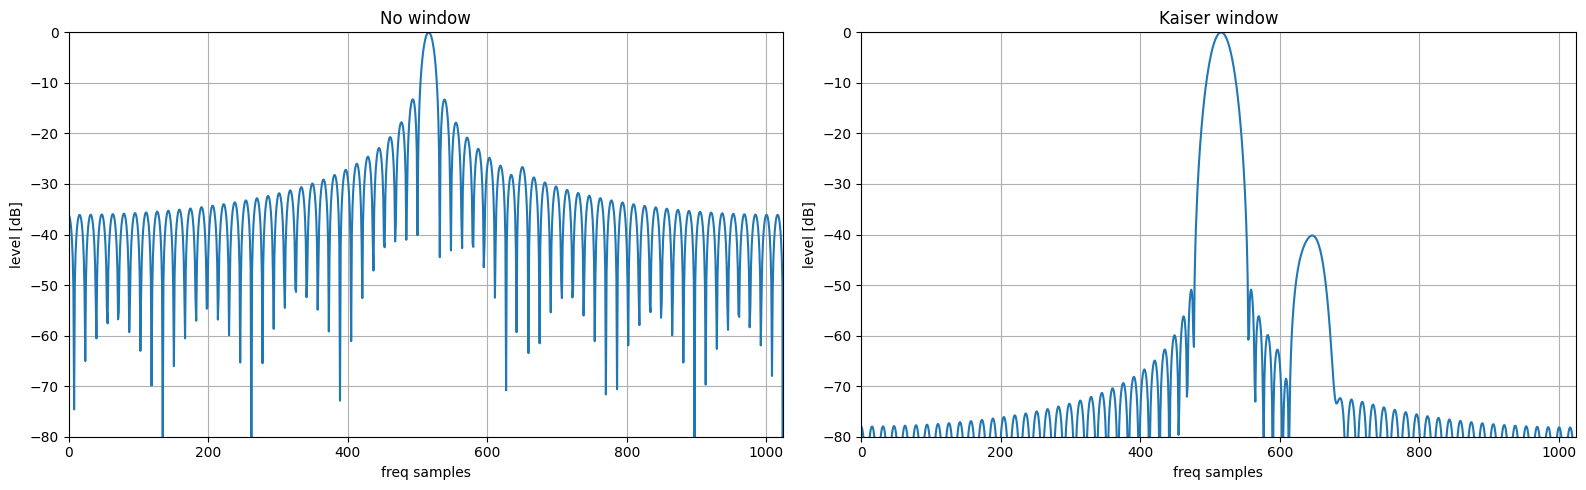

In [ ]:
# Input parameters
N = 128
NFFT = 2048

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = 100*np.cos(2*np.pi*32*tt)+np.cos(2*np.pi*40*tt)

# Window (Kaiser)
wn = sig.kaiser(N, beta=7)
yy = xx*wn

# Calculate FFT 1
sft = np.abs(fft(xx, NFFT))
slg = 20*np.log10(sft / np.max(sft))

# Calculate FFT 2
yft = np.abs(fft(yy, NFFT))
ylg = 20*np.log10(yft / np.max(yft))

lst_ffts = [slg, ylg]
lst_wins = ['No window', 'Kaiser window']
plt.figure(figsize=(16, 5))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(lst_wins[i])
    plt.xlabel('freq samples')
    plt.ylabel('level [dB]')
    plt.plot(lst_ffts[i])
    plt.xlim([0, NFFT//2])
    plt.ylim([-80, 0])
    plt.grid(True)
plt.tight_layout()

Seperti yang dapat dilihat pada gambar sebelumnya, tanpa fungsi window, hampir tidak mungkin untuk membedakan sinyal yang lemah terhadap sinyal yang kuat. Namun demikian, dengan menerapkan fungsi window dengan sifat penekanan yang baik, maka dimungkinkan untuk mendeteksi sinyal lemah di latar belakang sinyal yang kuat!

Dalam kode ini, untuk membandingkan spektrum dari dua sinyal yang berbeda yang sama-sama memiliki panjang 128 namun di-window dengan jendela Kaiser dan tanpa jendela (straight).

Berikut penjelasan:

1. Inisialisasi Variabel:
'N = 128': Panjang sinyal yang akan digunakan.
'NFFT = 2048': Panjang FFT yang akan digunakan. Ini lebih besar dari panjang sinyal untuk meningkatkan resolusi frekuensi.

2. Sinyal Input:
'tt = np.linspace(0, 1, N, endpoint=True)': Membuat array waktu dengan panjang 128 dari 0 hingga 1.
'xx = 100*np.cos(2*np.pi*32*tt)+np.cos(2*np.pi*40*tt)': Membuat sinyal gabungan yang terdiri dari dua gelombang sinus dengan frekuensi 32 Hz dan 40 Hz, masing-masing dikalikan dengan 100 dan disusun berdasarkan array waktu.

3. Jendela (Kaiser):
'wn = sig.kaiser(N, beta=7)': Membuat jendela Kaiser dengan parameter beta sebesar 7 dan panjang 128.
'yy = xx*wn': Mengalikan sinyal asli dengan jendela Kaiser untuk mendapatkan sinyal yang di-window.

4. Perhitungan FFT:
'sft = np.abs(fft(xx, NFFT))': Menghitung FFT dari sinyal asli xx dengan panjang NFFT.
'slg = 20*np.log10(sft / np.max(sft))': Mengonversi spektrum menjadi skala logaritmik dalam desibel (dB) dengan normalisasi ke nilai maksimum.
'yft = np.abs(fft(yy, NFFT))': Menghitung FFT dari sinyal yang di-window yy dengan panjang NFFT.
'ylg = 20*np.log10(yft / np.max(yft))': Mengonversi spektrum menjadi skala logaritmik dalam desibel (dB) dengan normalisasi ke nilai maksimum.

Plot Spektrum:
Dua plot dibuat, masing-masing untuk sinyal tanpa jendela dan dengan jendela Kaiser.
'plt.subplot(1,2,i+1)': Menentukan posisi subplot dalam grid 1x2.
Setiap plot menampilkan spektrum sinyal dalam skala logaritmik dalam desibel dengan sumbu x yang diatur dari 0 hingga setengah panjang FFT, dan sumbu y dari -80 dB hingga 0 dB.

Judul plot menunjukkan apakah jendela Kaiser digunakan atau tidak.
Dengan ini , plot tersebut untuk membandingkan efek penggunaan jendela Kaiser pada spektrum sinyal.